# Disease Prediction using Machine Learning

Based on the dataset made available in https://www.geeksforgeeks.org/disease-prediction-using-machine-learning/. Only the data was used, the implementation was not based on the solution provided.

### Library Import

In [53]:
### Library imports
import pandas as pd # Import Pandas library for CSV reading
import matplotlib as mpl # Import Matplotlib library for plot's customization
import numpy as np # Import Numpy for number manipulation

### Data Processing

Number of symptoms: 132
Number of train cases: 4920
Number of test cases: 42
NaN values in train set: 4920
NaN values in test set: 4920
NaN values in train set (after filtering): 0
Number of possible prognosis: 41


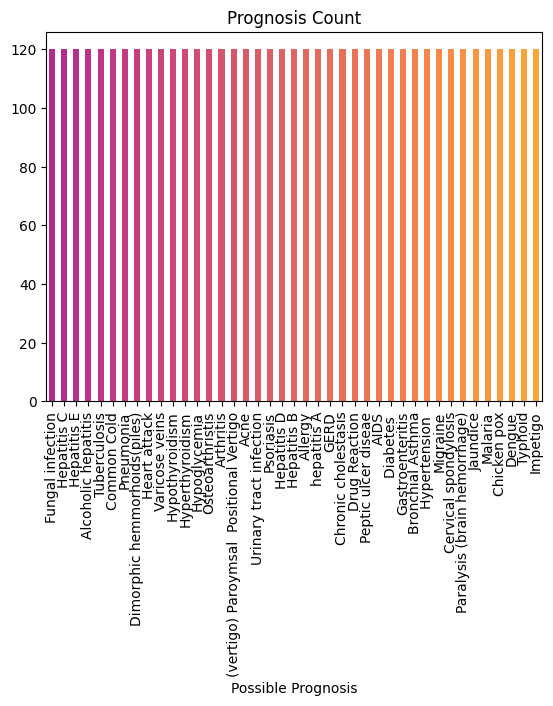

In [54]:
train_data_path = "./data/Training.csv" # Train CSV path declaration
test_data_path = "./data/Testing.csv" # Test CSV path declaration

train_data_df = pd.read_csv(train_data_path) # CSV reading using Pandas
test_data_df = pd.read_csv(test_data_path) # CSV reading using Pandas

num_symptoms = test_data_df.shape[1] - 1

print("Number of symptoms:", num_symptoms) # Number of symptoms evaluated (excludes the last collumn that contains the result)
print("Number of train cases:", train_data_df.shape[0]) # Number of train cases
print("Number of test cases:", test_data_df.shape[0]) # Number of test cases
print("NaN values in train set:", train_data_df.isnull().sum().sum()) # Number of values NaN in the train data (identified as the last collumn)
print("NaN values in test set:", train_data_df.isnull().sum().sum()) # Number of values NaN in the test data

train_data_df = train_data_df.drop(train_data_df.columns[train_data_df.shape[1] - 1], axis=1) # Droping column causing the NaN values
print("NaN values in train set (after filtering):", train_data_df.isnull().sum().sum()) # Number of values NaN in the train data (after processing)

prognosis_list = list(train_data_df['prognosis'].unique()) # Create a list of the possible prognosis
prognosis_num = len(prognosis_list) # Counts the number of possible prognosis
print("Number of possible prognosis:", prognosis_num) # Shows the number of possible prognosis

color = mpl.colormaps['plasma'](np.linspace(.4, .8, prognosis_num)) # Create the color map to use in the plotting process
train_data_df["prognosis"].value_counts().plot(kind="bar", color=color, title="Prognosis Count", xlabel="Possible Prognosis") # Display a bar plot of the diagnosis in the train dataset

# To create a fixed train-validation split. In this example, k-fold validation was opted
# train_data = train_data_df.sample(frac=0.75, random_state=42) # Creation of train-val split from the train data, as 75% is for training and the 25% is for validation. Random state was fixed for reproducibility
# val_data = train_data_df.drop(train_data.index) # Validation data definition
# test_data = test_data_df # Rename, for uniformity

### Label Encoding

In [ ]:
# Inserts into the train data dataframe a new column that contains a code for a certain disease instead of the name
train_prognosis_codes = []
for prog in train_data_df['prognosis']:
    prog_code = prognosis_list.index(prog)
    train_prognosis_codes.append(prog_code)
train_data_df.insert(train_data_df.shape[1], "prognosis_code", train_prognosis_codes)

# Inserts into the test data dataframe a new column that contains a code for a certain disease instead of the name
test_prognosis_codes = []
for prog in test_data_df['prognosis']:
    prog_code = prognosis_list.index(prog)
    test_prognosis_codes.append(prog_code)
test_data_df.insert(test_data_df.shape[1], "prognosis_code", test_prognosis_codes)

### K-Folds (k=10)

In [55]:
k = 10 # Defines the number of folds

fold_size = len(train_data_df) // k # Creates the fold size
indices = np.arange(len(train_data_df)) # Creates the indeces for the given data
fold_indices = [] # Initiates the indices array
for i in range(k):
    val_indices = indices[i * fold_size: (i + 1) * fold_size] # Defines which indices correspond to test
    train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]]) # Defines which indices correspond to train
    fold_indices.append((train_indices, val_indices)) # Appends the indices to the respective list

### Model's Application

Logistic Regression Mean Accuracy: 1.0


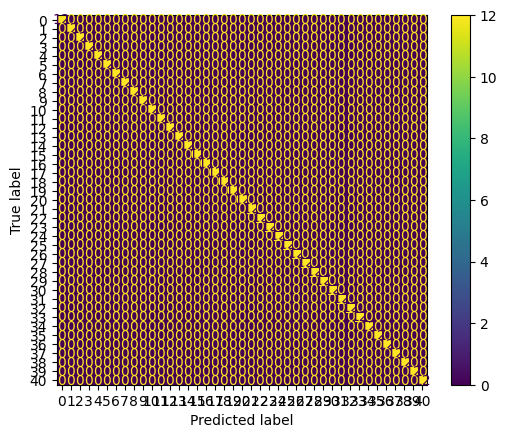

<Figure size 1200x800 with 0 Axes>

Decision Tree Mean Accuracy: 1.0


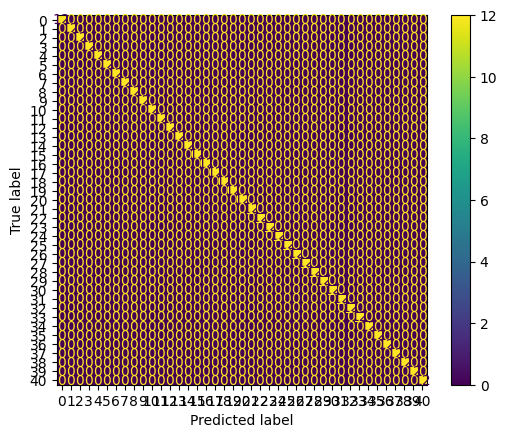

<Figure size 1200x800 with 0 Axes>

Random Forest Mean Accuracy: 1.0


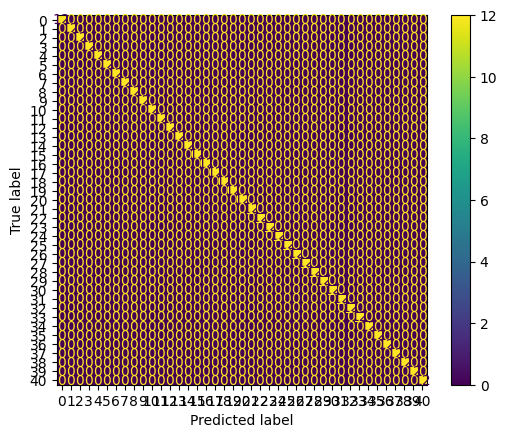

<Figure size 1200x800 with 0 Axes>

SVM Mean Accuracy: 1.0


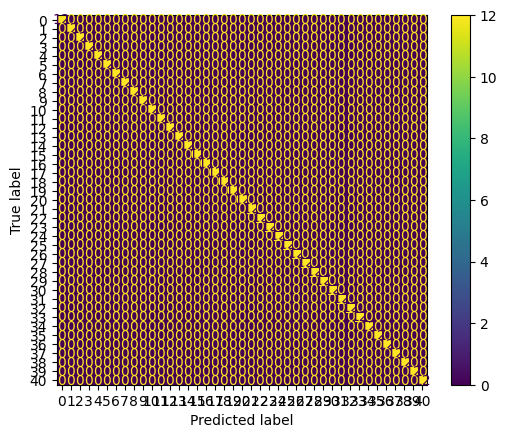

<Figure size 1200x800 with 0 Axes>

Gaussian Naive-Bayes Mean Accuracy: 1.0


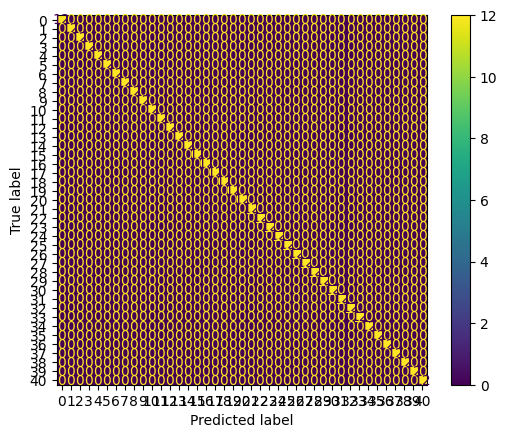

<Figure size 1200x800 with 0 Axes>

In [79]:
# Import the ML models to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay # Import the metrics to use
from matplotlib import pyplot as plt # Import 

models = { # Create a dictionary with the name of the models to use and the Scikit-learn models. The parameters are here tweaked.
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gaussian Naive-Bayes": GaussianNB()
}

for model_name in models:
    model = models[model_name]
    accuracies = [] # Declare the array that stores the accuracy information
    cm_list = [] # Declare the list that stores the confusion matrix in each fold
    X = train_data_df.iloc[:, :num_symptoms].to_numpy() # Indicates the independent variable
    Y = train_data_df.iloc[:, (num_symptoms + 1):].to_numpy().ravel() # Indicates the dependent variable

    # In each fold
    for train_indices, val_indices in fold_indices:
        X_train, Y_train = X[train_indices], Y[train_indices] # Declare the values used for training
        X_val, Y_val = X[val_indices], Y[val_indices] # Declare the values used for validation
        model.fit(X_train, Y_train) # Train the model
        Y_pred = model.predict(X_val) # Predict using the model
        accuracies.append(accuracy_score(Y_val, Y_pred)) # Calculate the resulting accuracy and store it
        cm_list.append(confusion_matrix(Y_val, Y_pred)) # Calculate the resulting confusion matrix and store it

    accuracy_mean = np.mean(accuracies) # Calculate the mean of the attained accuracies
    cm_mean = np.mean(cm_list, axis=0) # Calculate the mean of the attained confusion matrix
    print(model_name, "Mean Accuracy:", accuracy_mean) # Print the accuracy results
    
    # Display the confusion matrix for each model
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_mean)
    disp.plot()
    plt.figure(figsize=(12,8))
    plt.show()

### Model's Testing

Logistic Regression Mean Accuracy: 1.0


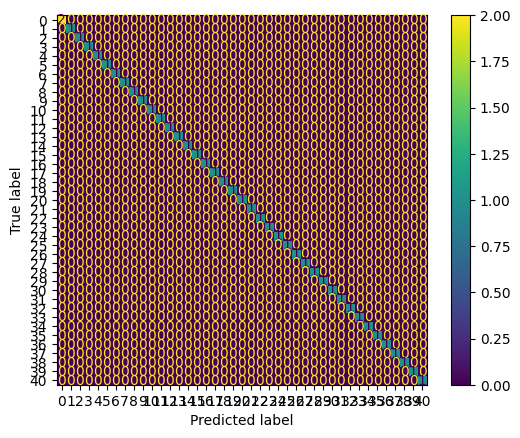

<Figure size 1200x800 with 0 Axes>

Decision Tree Mean Accuracy: 0.9761904761904762


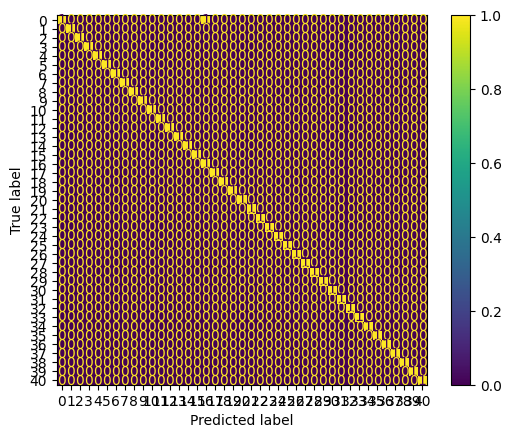

<Figure size 1200x800 with 0 Axes>

Random Forest Mean Accuracy: 0.9761904761904762


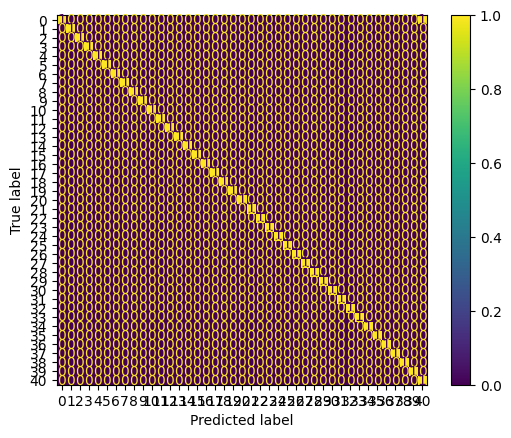

<Figure size 1200x800 with 0 Axes>

SVM Mean Accuracy: 1.0


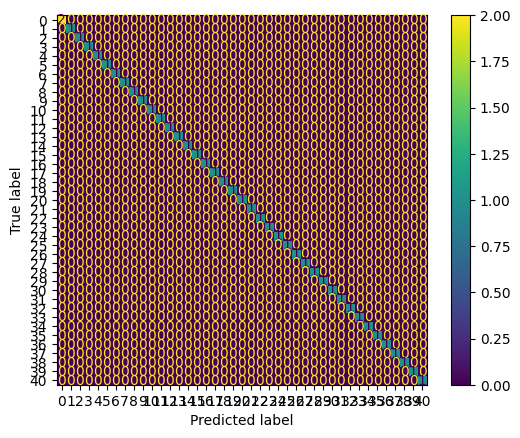

<Figure size 1200x800 with 0 Axes>

Gaussian Naive-Bayes Mean Accuracy: 1.0


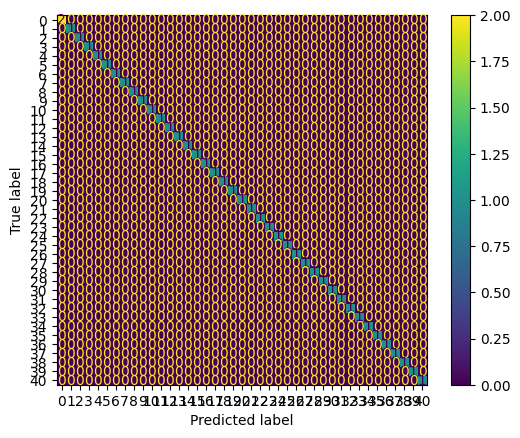

<Figure size 1200x800 with 0 Axes>

In [81]:
# Import the ML models to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay # Import the metrics to use
from matplotlib import pyplot as plt # Import 

models = { # Create a dictionary with the name of the models to use and the Scikit-learn models. The parameters are here tweaked.
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gaussian Naive-Bayes": GaussianNB()
}

for model_name in models:
    model = models[model_name]
    accuracies = [] # Declare the array that stores the accuracy information
    cm_list = [] # Declare the list that stores the confusion matrix in each fold
    X = train_data_df.iloc[:, :num_symptoms].to_numpy() # Indicates the independent variable
    Y = train_data_df.iloc[:, (num_symptoms + 1):].to_numpy().ravel() # Indicates the dependent variable

    X_test = test_data_df.iloc[:, :num_symptoms].to_numpy() # Indicates the independent variable
    Y_test = test_data_df.iloc[:, (num_symptoms + 1):].to_numpy().ravel() # Indicates the dependent variable

    model.fit(X, Y) # Train the model
    Y_pred = model.predict(X_test) # Predict using the model
    accuracy = accuracy_score(Y_test, Y_pred) # Calculate the resulting accuracy and store it
    cm = confusion_matrix(Y_test, Y_pred) # Calculate the resulting confusion matrix and store it

    print(model_name, "Mean Accuracy:", accuracy) # Print the accuracy results
    
    # Display the confusion matrix for each model
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.figure(figsize=(12,8))
    plt.show()